<H1> CURSO DE INTRODUÇÃO A MACHINE LEARNING - LDS <H2>

In [1]:
%matplotlib inline

In [2]:
#IMPORTS 

# Biblioteca Padrão de Matemática
import math

#matplotlib pyplot
import matplotlib.pyplot as plt

#taamnho das figuras
plt.rcParams['figure.figsize'] = (8,4)

#NumPy
import numpy as np

#scipy stats
from scipy import stats

In [3]:
# Dataset 1 - Amostra Aleatória de Alturas de Homens Cearenses
H = [160,170,180,190,150,145,163,172,156,181,190,170,165,168,167,166,164,166,172,173,150,152,153,164] 

<h2> Calculando as Médias </h2>

In [4]:
# calculando a media Python Puro
sum(H)/len(H)

166.125

In [5]:
# Calculando a media usando numpy
np.mean(H)

166.125

<h2> Calculando as Medianas <h2>

In [6]:
#python puro
n = len(H)
hl = sorted(H)
if n%2==0:
    i=int(n/2)-1 # a lista começa na posição 0
    mediana = (hl[i]+hl[i+1])/2
else:
    i=int((n+1)/2)
    mediana = hl[i]

In [7]:
mediana

166.0

In [8]:
# mediana em numpy
np.median(H)

166.0

In [9]:
metade1 = [ i for i in hl if i < mediana]
metade2 = [ i for i in hl if i > mediana]

In [10]:
metade1

[145, 150, 150, 152, 153, 156, 160, 163, 164, 164, 165]

In [11]:
metade2

[167, 168, 170, 170, 172, 172, 173, 180, 181, 190, 190]

<h2> Porque usar numpy? <h2>

In [12]:
#criando uma matriz NP
Z = np.array([[1,2,3],
              [4,5,6],
              [7,8,9]])

In [13]:
Z.shape

(3, 3)

In [14]:
np.median(Z)

5.0

<h2> Moda </h2>

In [15]:
stats.mode(H)

ModeResult(mode=array([150]), count=array([2]))

<h2> Variância e Desvio Padrão </h2>

In [16]:
#Python Puro
n = len(H)
media = sum(H)/n
soma_desvios_quad = 0
for i in H:
    soma_desvios_quad += (i - media)**2
variancia = soma_desvios_quad/n
desvioPadrao = math.sqrt(soma_desvios_quad/n)

In [17]:
variancia

133.44270833333334

In [18]:
desvioPadrao

11.551740489351955

In [19]:
# Desvio Padrão em NUMPY
print(np.std(H))

11.5517404894


<h2> Estudo de Correlação </h2>
<h3> O índice de inflação no Brasil e o valor do Dólar sempre aumentam ou diminuem juntos? </h3>
<h3> O que você acha ? </h3>

In [20]:
# Dataset 2
# variaçao do dolar comercial entre maio 2018 e maio de 2019
dolar    = [3.6753, 3.7738, 3.8745, 3.9134, 4.1879, 3.7332, 3.7924, 3.9090,3.6513,3.7379, 3.8961,3.9447, 3.9401  ] 

In [21]:
# Dataset 3
#índice de inflação brasileira entre junho de 2018 e maio de 2019
inflacao = [1.26, 0.33, -0.09, 0.48, 0.45, -0.21, 0.15, 0.32, 0.43, 0.75, 0.57, 0.13 ]

<h3> Aqui precisamos fazer uma TRANSFORMAÇÃO DE DADOS </h3>

In [22]:
variacaoDolar = [(dolar[i+1]-dolar[i])/dolar[i] for i in range(len(dolar)-1)]

In [23]:
#matrizes numpy
dl = np.array(variacaoDolar)
inf = np.array(inflacao)

In [24]:
# python puro
def coefCorrelacao(a,b):
    mediaA = sum(a)/len(a)
    mediaB = sum(b)/len(b)
    difA=0
    difB=0
    aux1 =0
    aux2 =0
    aux3 =0
    for i,k in zip(a,b):
        tda = i - mediaA
        tdb = k - mediaB
        pdab = tda * tdb
        aux1 += pdab
        aux2 += tda**2
        aux3 += tdb**2
    aux2 = math.sqrt(aux2)
    aux3 = math.sqrt(aux3)
    return aux1/(aux2 * aux3)

In [25]:
coefCorrelacao(variacaoDolar,inflacao)

0.11589156216431971

<h3> Visualizações </h3><br>
<h3> Boxplot (Diagrama de Caixa) </h3>
(Visualização de Simetria da Distribuição e Detecção de Outliers)

{'boxes': [<matplotlib.lines.Line2D at 0x1a08fe2860>],
 'caps': [<matplotlib.lines.Line2D at 0x1a10348208>,
 'fliers': [<matplotlib.lines.Line2D at 0x1a10348eb8>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x1a10348a58>],
 'whiskers': [<matplotlib.lines.Line2D at 0x1a10330828>,
  <matplotlib.lines.Line2D at 0x1a10330da0>]}

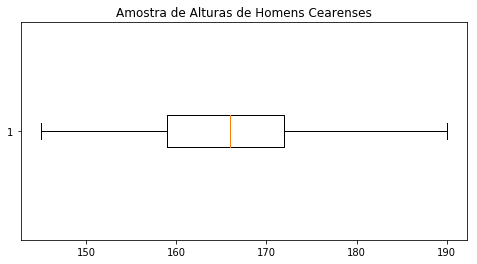

In [26]:
# boxplot das alturas
fig, ax = plt.subplots()
ax.set_title('Amostra de Alturas de Homens Cearenses')
ax.boxplot(H,vert=False)

<h3> Observe a Presença de um outlier (Valor Discrepante) na inflação. </h3>

{'boxes': [<matplotlib.lines.Line2D at 0x1a103c4198>],
 'caps': [<matplotlib.lines.Line2D at 0x1a103c4c50>,
 'fliers': [<matplotlib.lines.Line2D at 0x1a103cc9b0>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x1a103cc550>],
 'whiskers': [<matplotlib.lines.Line2D at 0x1a103c4320>,
  <matplotlib.lines.Line2D at 0x1a103c47f0>]}

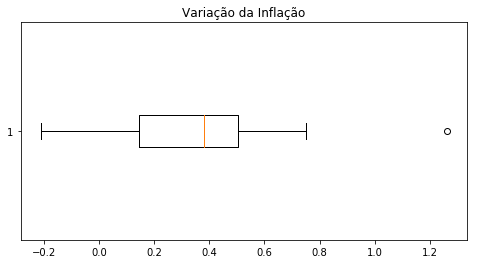

In [27]:
#
fig, ax = plt.subplots()
ax.set_title('Variação da Inflação')
ax.boxplot(inf,vert=False)

<h3> Histogramas </h3>

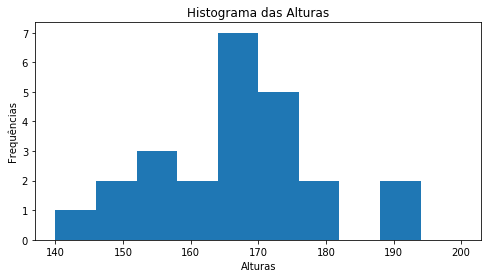

In [28]:
# Simples
plt.xlabel('Alturas')
plt.ylabel('Frequências')
plt.title('Histograma das Alturas')
plt.hist(H,range=(140,200))
plt.show()

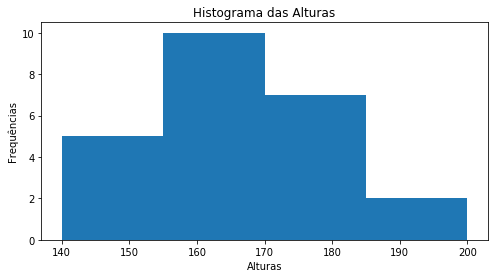

In [29]:
# Simples
plt.xlabel('Alturas')
plt.ylabel('Frequências')
plt.title('Histograma das Alturas')
plt.hist(H,bins=[140,155,170,185,200],range=(140,200))
plt.show()

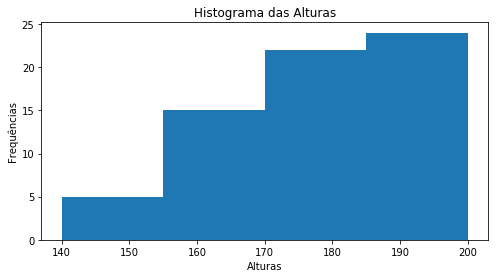

In [30]:
# frequência acumulada
plt.xlabel('Alturas')
plt.ylabel('Frequências')
plt.title('Histograma das Alturas')
plt.hist(H,cumulative=True, range=(140,190),bins=[140,155,170,185,200])
plt.show()

(array([ 20.83333333,  41.66666667,  29.16666667,   8.33333333]),
 array([140, 155, 170, 185, 200]),
 <a list of 4 Patch objects>)

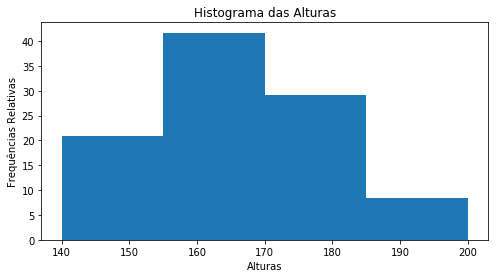

In [31]:
data = np.array(H)
plt.xlabel('Alturas')
plt.ylabel('Frequências Relativas')
plt.title('Histograma das Alturas')
plt.hist(data, weights=np.zeros_like(data) + 100. / data.size,bins=[140,155,170,185,200],range=(140,190))

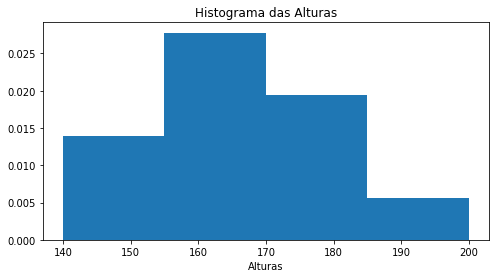

In [53]:
# normalizando a área (area total = 1)
# caso se tratasse de uma função contínua teríamos uma função densidade de probabilidade

plt.xlabel('Alturas')
plt.title('Histograma das Alturas')
plt.hist(H,bins=[140,155,170,185,200],range=(140,200),density=True) 
plt.show()

<h3> Diagramas de Dispersão (Scatter Plots) </h3>

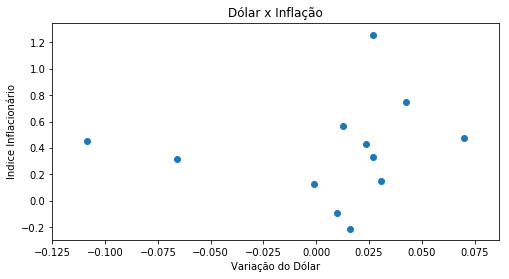

In [32]:
#imprimindo um gráfico de dispersão scatter plot
plt.xlabel('Variação do Dólar')
plt.ylabel('Indice Inflacionário')
plt.title('Dólar x Inflação')
plt.scatter(variacaoDolar,inflacao, alpha=1)
plt.show()

<h2> Aparentemente neste período a variação do dólar e o índice de inflação(IPCA/IGP) foram independentes </h2>